In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Decision Tree and Random Forest algorithms

The initial number of candidate splits is equal to the number of features. At the beginning of the training, the algorithm will chose the feature that produces a split with the lowest cost to be the root of the tree. Then the splits are done recursively until a minimum error condition is satisfied.

In the case of a Regression Problem, the cost function is:
\begin{equation}
    J = \sum (y-prediction)^2
\end{equation}

The predicted value of a group will be the mean of the responses in that group.

In the case of a Classification Problem, a Gini score is used. To __make a split__, the __criteria__ chosen is the one who results in the __highest__ gini score. The __goal__ is to produce __branches__ with __lower__ gini score (more homogeneous) in order to make a good prediction.

\begin{equation}
    G = \sum_{k=1}^{C} (p_k*(1-p_k))
\end{equation}

Here, $p_k$ is proportion of same class inputs present in a particular group. The predicted class of a group will be the one that has more ocurrences. 

In both cases the cost functions try to find most homogeneous branches, or branches having groups with similar responses.

Branches are the result of a split, they may have different groups depending on the spliting criteria. 

For example if we tried to predict the price of a car based on the color, the cost function would be higher than if we tried to predict it based on the type, because there is more variation in the color groups than in the type groups.  

In the case of classification, if we try to predict weather a person is going to contract a insurance or not, it is better to separate by age than by sex for example. 

Random Forest uses decision tree underneath and forms multiple trees with random slices of the training dataset, then it takes majority vote out of it.

__Example description__: Predict whether a person died in the titanic or not based on fare, sex, age and passenger class.

In [6]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df = df[['Survived','Sex','Age', 'Pclass','Fare']]

In [7]:
from sklearn.preprocessing import LabelEncoder   # Encoding strings to numbers
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df.dropna(inplace = True)
df.head()

,Survived,Sex,Age,Pclass,Fare
0,0,1,22.0,3,7.2500
1,1,0,38.0,1,71.2833
2,1,0,26.0,3,7.9250
3,1,0,35.0,1,53.1000
4,0,1,35.0,3,8.0500


/home/igor/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

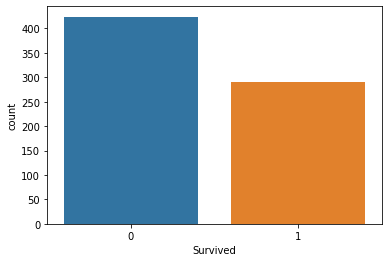

In [8]:
import seaborn as sns
sns.countplot(df['Survived'])

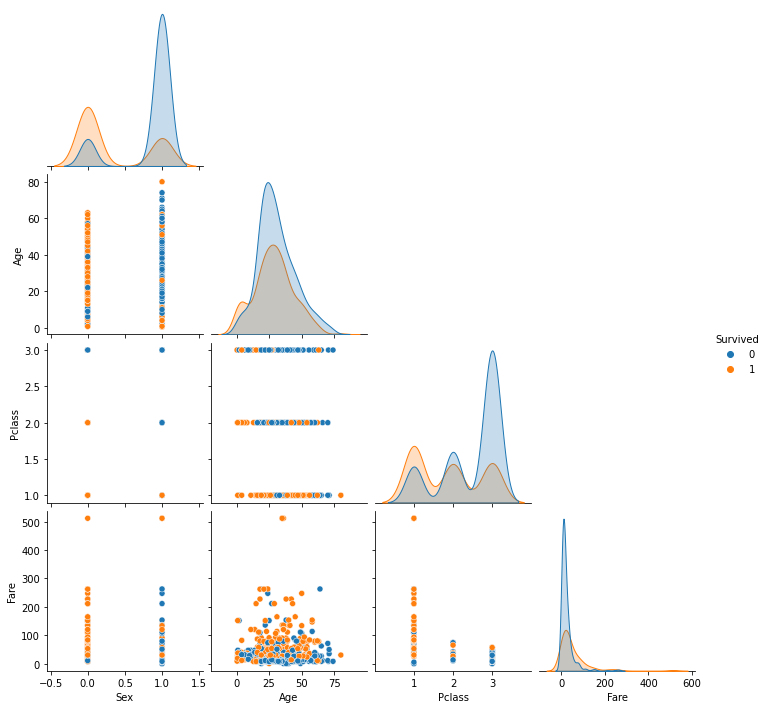

In [9]:
sns.pairplot(df, hue = 'Survived', corner = True)

In [10]:
import numpy as np
y = np.array(df['Survived'])
X = np.array(df.drop(['Survived'],1)) 

In [11]:
from sklearn import tree, model_selection
X_train, X_test, y_train , y_test = model_selection.train_test_split(X,y, test_size = 0.1) 
model = tree.DecisionTreeClassifier(max_leaf_nodes = 2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

DecisionTreeClassifier(max_leaf_nodes=2)

0.8055555555555556

In [12]:
model.feature_importances_ # Sex is the only important feature, this is not the best example for this algorithm

array([1., 0., 0., 0.])

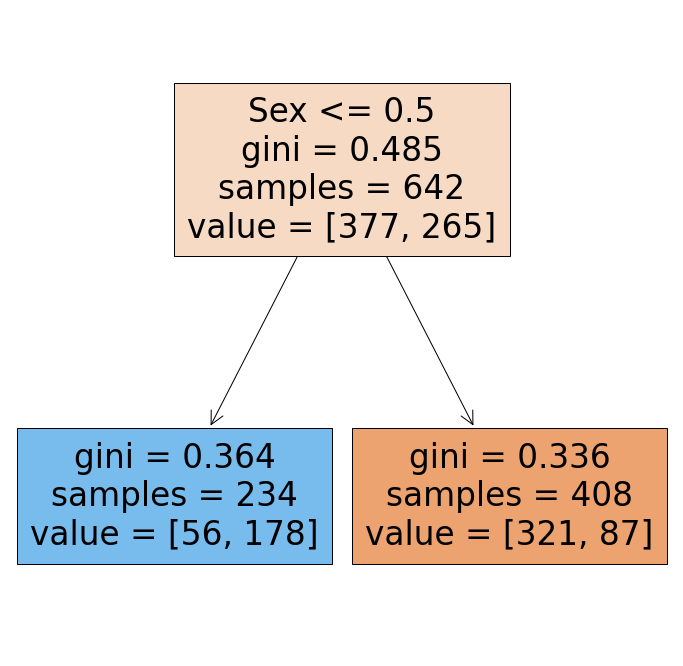

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
tree.plot_tree(model,
               feature_names = ['Sex','Age','Pclass','Fare'],
               filled = True
              );

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_leaf_nodes = 7, n_estimators = 9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

RandomForestClassifier(max_leaf_nodes=7, n_estimators=9)

0.7638888888888888

In [15]:
model.feature_importances_

array([0.4821783 , 0.08547894, 0.19895124, 0.23339152])